In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [18]:
# Cargar el archivo Excel
ruta_archivo = "../02.Generación Pearson.xlsx"

# Cargar los datos asegurando que 'Fecha' se interprete como índice y fecha
datos = pd.read_excel(ruta_archivo)

# Mostrar las primeras filas para verificar
datos

,Fecha,Generación,Índice UV,Temperatura,Hora,DPT,Cobertura Nubes,Condición Cielo,Humedad Relativa
0,2022-09-01 00:00:00,0.0,0.0,19,24,15,98,4,77
1,2022-09-01 01:00:00,0.0,0.0,19,1,16,82,4,82
2,2022-09-01 02:00:00,0.0,0.0,18,2,16,73,3,85
3,2022-09-01 03:00:00,0.0,0.0,18,3,16,63,3,87
4,2022-09-01 04:00:00,0.0,0.0,18,4,16,70,3,88
...,...,...,...,...,...,...,...,...,...
18285,2024-10-02 20:00:00,0.0,0.0,22,20,9,2,1,45
18286,2024-10-02 21:00:00,0.0,0.0,20,21,10,1,1,54
18287,2024-10-02 22:00:00,0.0,0.0,18,22,11,0,1,62
18288,2024-10-02 23:00:00,0.0,0.0,17,23,11,0,1,69


In [19]:
datos.index = pd.to_datetime(datos['Fecha'], format='%Y-%m-%d %H:%M:%s')
datos[:26]

,Fecha,Generación,Índice UV,Temperatura,Hora,DPT,Cobertura Nubes,Condición Cielo,Humedad Relativa
Fecha,,,,,,,,,
2022-09-01 00:00:00,2022-09-01 00:00:00,0.000000,0.0,19,24,15,98,4,77
2022-09-01 01:00:00,2022-09-01 01:00:00,0.000000,0.0,19,1,16,82,4,82
2022-09-01 02:00:00,2022-09-01 02:00:00,0.000000,0.0,18,2,16,73,3,85
2022-09-01 03:00:00,2022-09-01 03:00:00,0.000000,0.0,18,3,16,63,3,87
2022-09-01 04:00:00,2022-09-01 04:00:00,0.000000,0.0,18,4,16,70,3,88
2022-09-01 05:00:00,2022-09-01 05:00:00,0.000000,0.0,17,5,14,45,3,86
2022-09-01 06:00:00,2022-09-01 06:00:00,0.000000,0.0,18,6,16,54,3,89
2022-09-01 07:00:00,2022-09-01 07:00:00,6.584959,0.0,18,7,17,70,4,95
2022-09-01 08:00:00,2022-09-01 08:00:00,560.422022,0.0,18,8,18,72,3,100


In [182]:
df_dia = datos[(datos['Hora']>=6) & (datos['Hora']<=20)]

<Axes: xlabel='Fecha'>

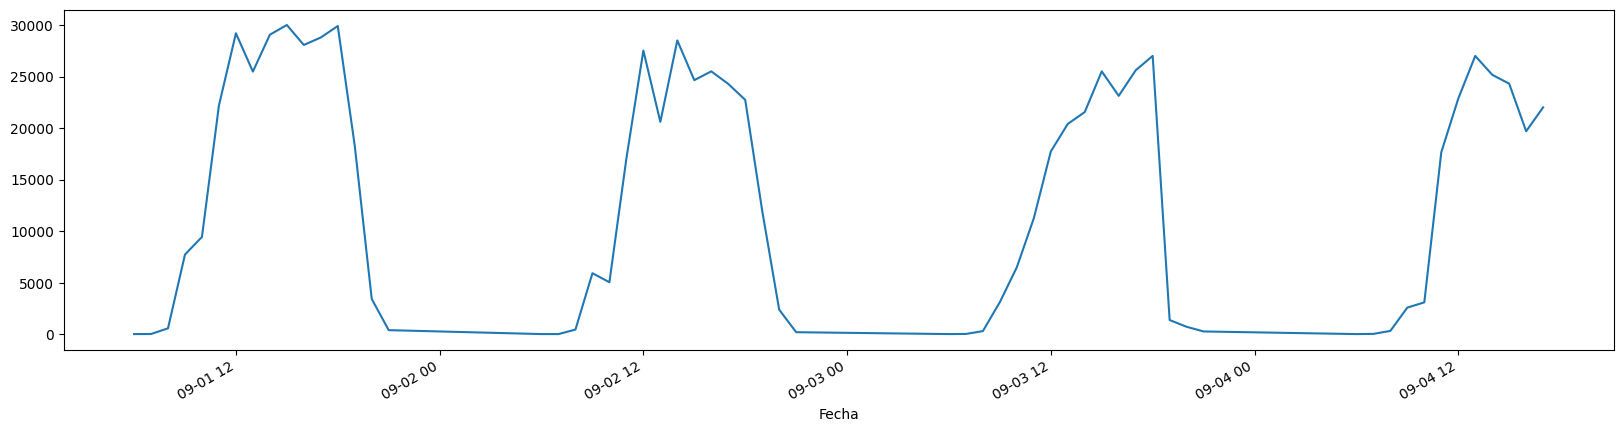

In [41]:
df_dia['Generación'][:60].plot(figsize=(20,5))

<Axes: xlabel='Fecha'>

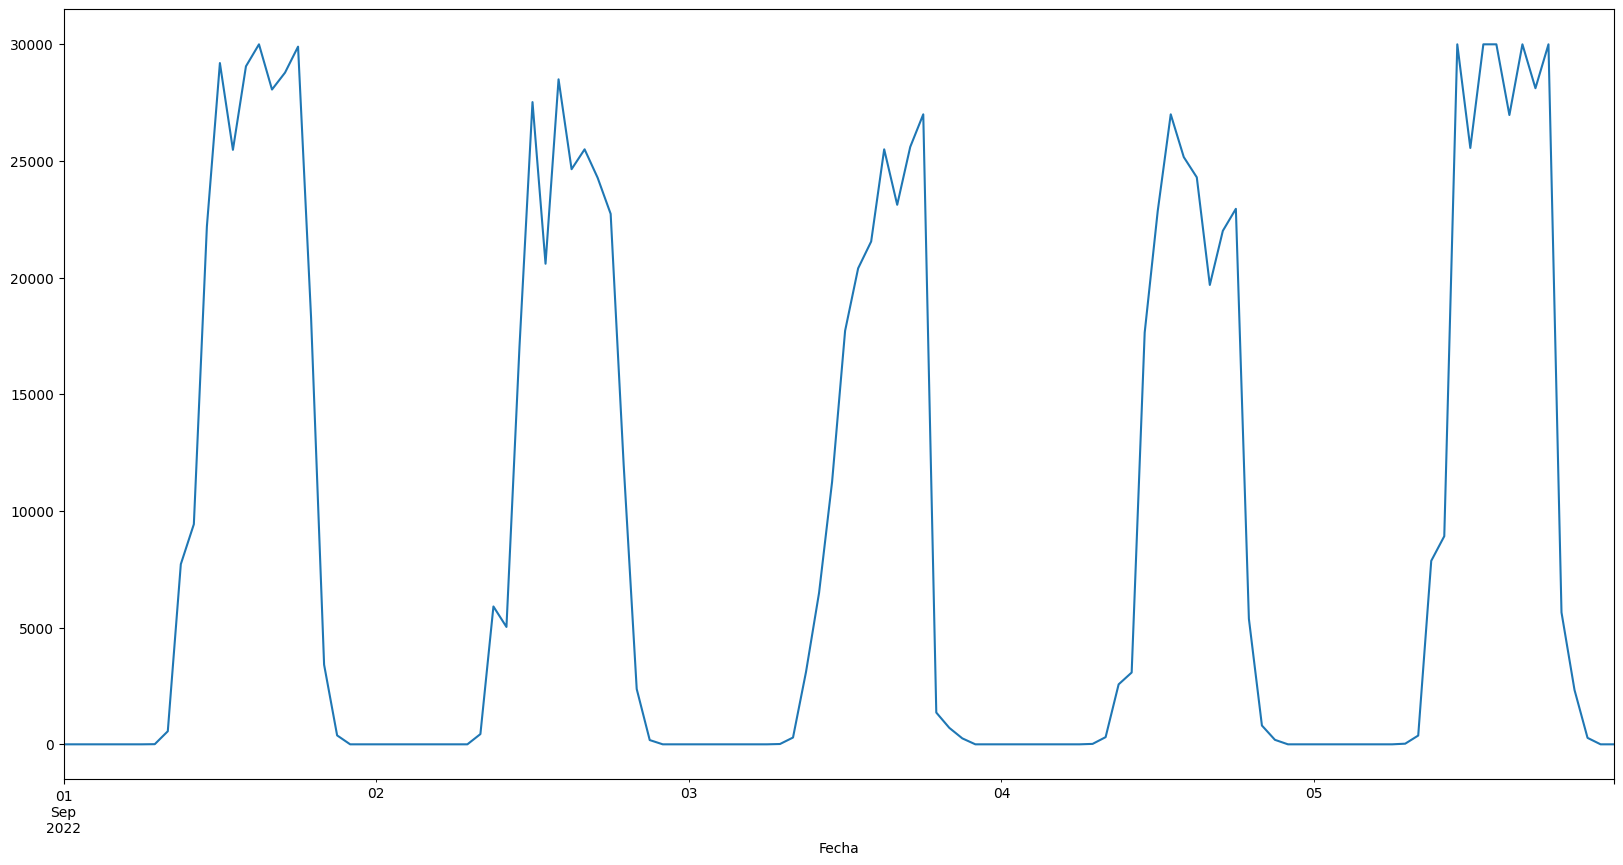

In [142]:
gen = datos['Generación']
gen[:120].plot(figsize=(20,10))

In [143]:
gen[:26]

Fecha
2022-09-01 00:00:00        0.000000
2022-09-01 01:00:00        0.000000
2022-09-01 02:00:00        0.000000
2022-09-01 03:00:00        0.000000
2022-09-01 04:00:00        0.000000
2022-09-01 05:00:00        0.000000
2022-09-01 06:00:00        0.000000
2022-09-01 07:00:00        6.584959
2022-09-01 08:00:00      560.422022
2022-09-01 09:00:00     7720.582326
2022-09-01 10:00:00     9433.109309
2022-09-01 11:00:00    22189.147406
2022-09-01 12:00:00    29196.986647
2022-09-01 13:00:00    25478.471342
2022-09-01 14:00:00    29057.585772
2022-09-01 15:00:00    30000.000000
2022-09-01 16:00:00    28062.328964
2022-09-01 17:00:00    28786.629243
2022-09-01 18:00:00    29900.303971
2022-09-01 19:00:00    18282.505369
2022-09-01 20:00:00     3411.083740
2022-09-01 21:00:00      382.187718
2022-09-01 22:00:00        0.000000
2022-09-01 23:00:00        0.000000
2022-09-02 00:00:00        0.000000
2022-09-02 01:00:00        0.000000
Name: Generación, dtype: float64

In [214]:
# [[[1], [2], [3], [4], [5]]] [6] 
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def datos_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for  a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [145]:
WINDOW_SIZE = 5
X, y = datos_to_X_y(gen, WINDOW_SIZE)
X.shape, y.shape

((18285, 5, 1), (18285,))

In [146]:
num_datos = X.shape[0]
train = int(round(num_datos*0.7,0))
val = int(train + round((num_datos - train) / 2, 0))

num_datos, train, val

(18285, 12800, 15542)

In [147]:
X_train, y_train = X[:train], y[:train]
X_val, y_val = X[train:val], y[train:val]
X_test, y_test = X[val:], y[val:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((12800, 5, 1), (12800,), (2742, 5, 1), (2742,), (2743, 5, 1), (2743,))

In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,681 (69.07 KB)

 Trainable params: 17,553 (68.57 KB)

 Non-trainable params: 128 (512.00 B)

In [174]:
cp = ModelCheckpoint('model1.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [150]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [151]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

In [152]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)


In [172]:
from sklearn.preprocessing import MinMaxScaler

scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_val = scaler_y.transform(y_val.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))


In [175]:
history = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[cp, early_stop])

Epoch 1/50


400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.8428 - root_mean_squared_error: 0.8990 - val_loss: 0.2679 - val_root_mean_squared_error: 0.5176
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2179 - root_mean_squared_error: 0.4666 - val_loss: 0.2338 - val_root_mean_squared_error: 0.4835
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1730 - root_mean_squared_error: 0.4151 - val_loss: 0.0526 - val_root_mean_squared_error: 0.2293
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0536 - root_mean_squared_error: 0.2312 - val_loss: 0.0311 - val_root_mean_squared_error: 0.1764
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0393 - root_mean_squared_error: 0.1982 - val_loss: 0.0258 - val_root_mean_squared_error: 0.1607
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0356 - root_mean_squared_error: 0.1888 - val_loss: 0.0242 - val_root_mean_squared_error: 0.1555
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0

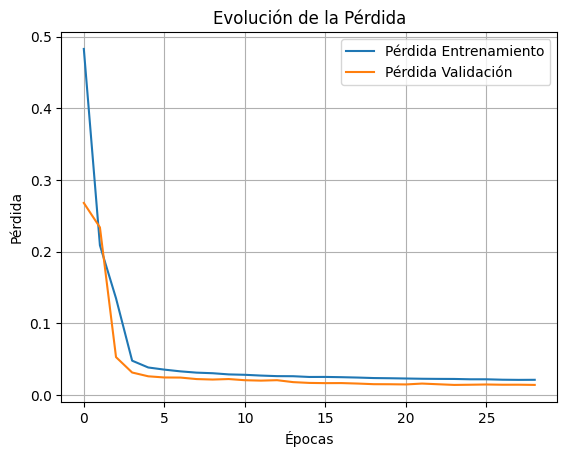

In [ ]:
import matplotlib.pyplot as plt

# Extraer la pérdida del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear la gráfica
plt.plot(train_loss, label='Pérdida Entrenamiento')
plt.plot(val_loss, label='Pérdida Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida')
plt.legend()
plt.grid(True)
plt.show()


In [177]:
test_loss = model1.evaluate(X_test, y_test)
print(f'Pérdida en conjunto de prueba: {test_loss}')


 1/86 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0106 - root_mean_squared_error: 0.1028

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126
Pérdida en conjunto de prueba: [0.012431365437805653, 0.11149603128433228]


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


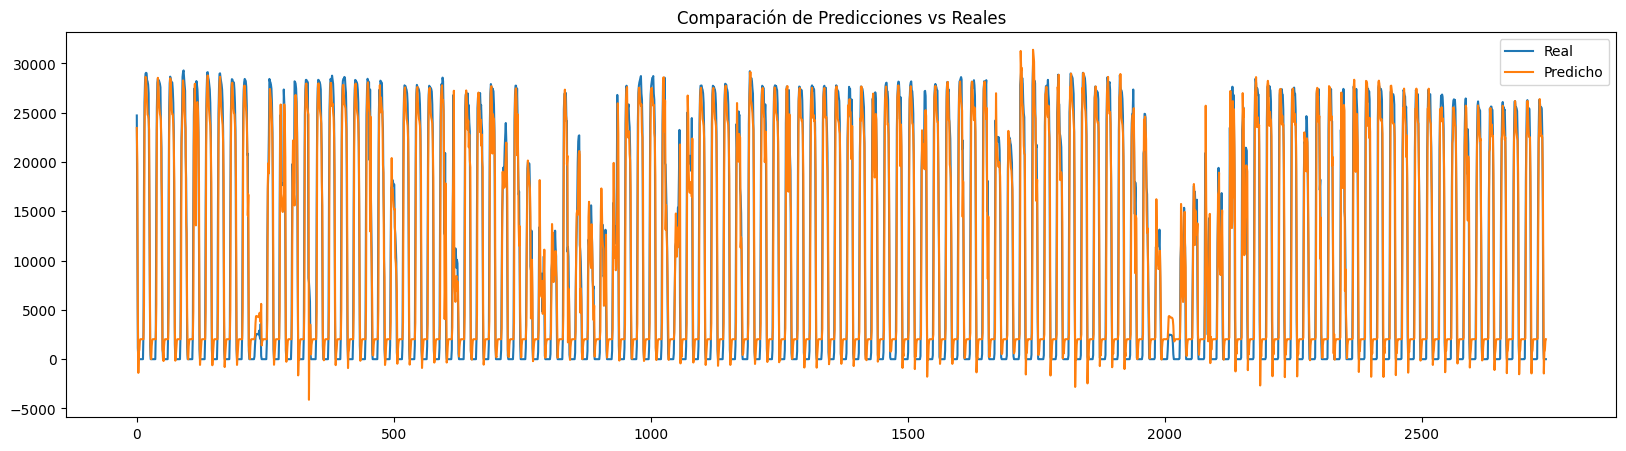

In [180]:
import matplotlib.pyplot as plt

y_pred = model1.predict(X_test)

# Invertir la normalización para obtener valores originales
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(20,5))
plt.plot(y_test_original[:], label="Real")
plt.plot(y_pred_original[:], label="Predicho")
plt.legend()
plt.title("Comparación de Predicciones vs Reales")
plt.show()


In [183]:
gen = df_dia['Generación']
gen

Fecha
2022-09-01 06:00:00        0.000000
2022-09-01 07:00:00        6.584959
2022-09-01 08:00:00      560.422022
2022-09-01 09:00:00     7720.582326
2022-09-01 10:00:00     9433.109309
                           ...     
2024-10-02 16:00:00    25386.000000
2024-10-02 17:00:00    22872.000000
2024-10-02 18:00:00    15825.000000
2024-10-02 19:00:00     1450.000000
2024-10-02 20:00:00        0.000000
Name: Generación, Length: 11430, dtype: float64

In [245]:
WINDOW_SIZE = 3
X, y = datos_to_X_y(gen, WINDOW_SIZE)
X.shape, y.shape

((11427, 3, 1), (11427,))

In [246]:
num_datos = X.shape[0]
train = int(round(num_datos*0.7,0))
val = int(train + round((num_datos - train) / 2, 0))

num_datos, train, val

(11427, 7999, 9713)

In [247]:
X_train, y_train = X[:train], y[:train]
X_val, y_val = X[train:val], y[train:val]
X_test, y_test = X[val:], y[val:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((7999, 3, 1), (7999,), (1714, 3, 1), (1714,), (1714, 3, 1), (1714,))

In [248]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(InputLayer((WINDOW_SIZE, 1)))
model2.add(LSTM(64))

model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'relu'))

model2.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [249]:
cp = ModelCheckpoint('model3.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [250]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [251]:
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_val = scaler_y.transform(y_val.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

In [252]:
history = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[cp, early_stop])

Epoch 1/50


250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.2467 - root_mean_squared_error: 0.4948 - val_loss: 0.0991 - val_root_mean_squared_error: 0.3148
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0875 - root_mean_squared_error: 0.2957 - val_loss: 0.0871 - val_root_mean_squared_error: 0.2951
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0814 - root_mean_squared_error: 0.2852 - val_loss: 0.0804 - val_root_mean_squared_error: 0.2836
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0764 - root_mean_squared_error: 0.2762 - val_loss: 0.0729 - val_root_mean_squared_error: 0.2701
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0670 - root_mean_squared_error: 0.2589 - val_loss: 0.0634 - val_root_mean_squared_error: 0.2519
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0590 - root_mean_squared_error: 0.2428 - val_loss: 0.0490 - val_root_mean_squared_error: 0.2215
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0

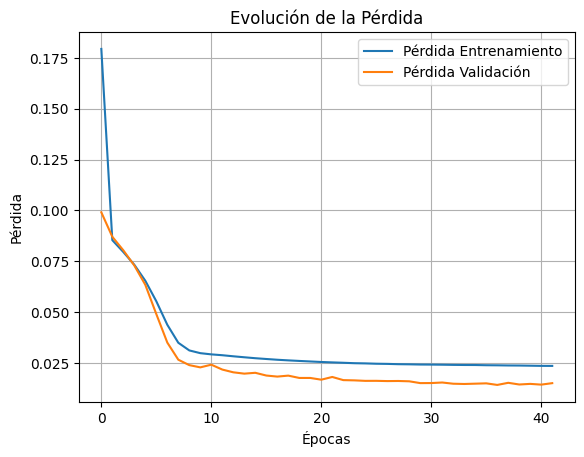

In [253]:
# Extraer la pérdida del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear la gráfica
plt.plot(train_loss, label='Pérdida Entrenamiento')
plt.plot(val_loss, label='Pérdida Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida')
plt.legend()
plt.grid(True)
plt.show()

In [254]:
test_loss = model2.evaluate(X_test, y_test)
print(f'Pérdida en conjunto de prueba: {test_loss}')

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - root_mean_squared_error: 0.1218
Pérdida en conjunto de prueba: [0.014263349585235119, 0.11942926794290543]


54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


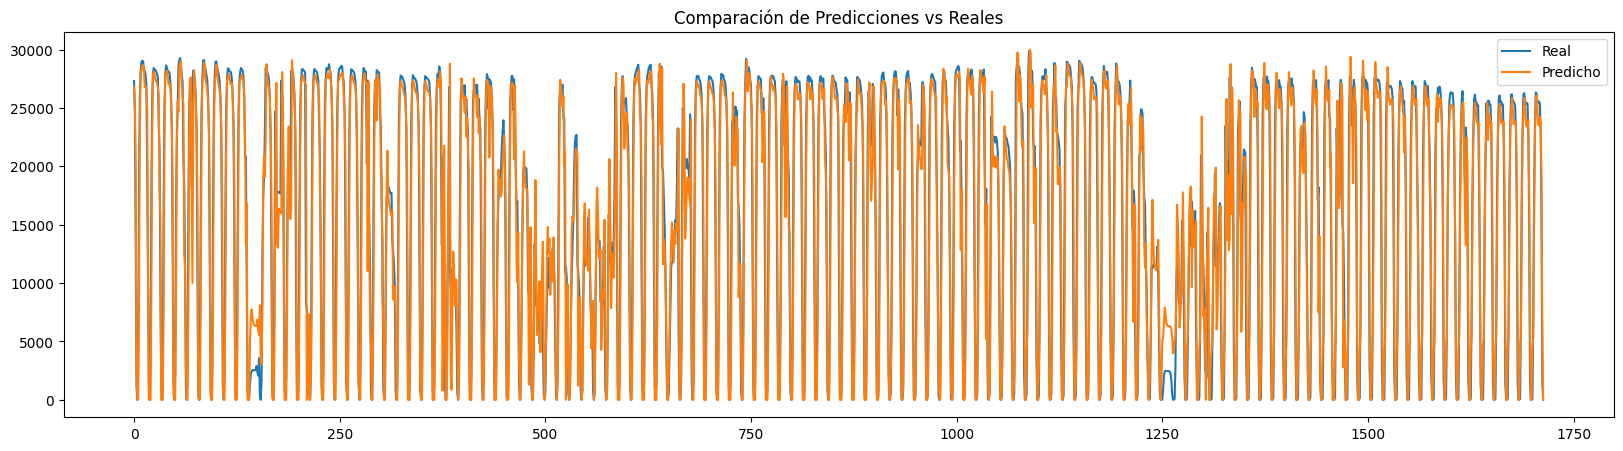

In [255]:
import matplotlib.pyplot as plt

y_pred = model2.predict(X_test)

# Invertir la normalización para obtener valores originales
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_pred_original = np.clip(y_pred_original, 0, 30000)
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(20,5))
plt.plot(y_test_original[:], label="Real")
plt.plot(y_pred_original[:], label="Predicho")
plt.legend()
plt.title("Comparación de Predicciones vs Reales")
plt.show()

In [256]:
from sklearn.metrics import mean_absolute_percentage_error as mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as mean_absolute_error
from sklearn.metrics import mean_squared_error as mean_squared_error
from sklearn.metrics import r2_score as r2_score

In [257]:
print(f"MAE: {mean_absolute_error(y_test_original, y_pred_original):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_original, y_pred_original)):.4f}")
print(f"R²: {r2_score(y_test_original, y_pred_original):.4f}")

MAE: 2382.2360
RMSE: 3582.6329
R²: 0.8868


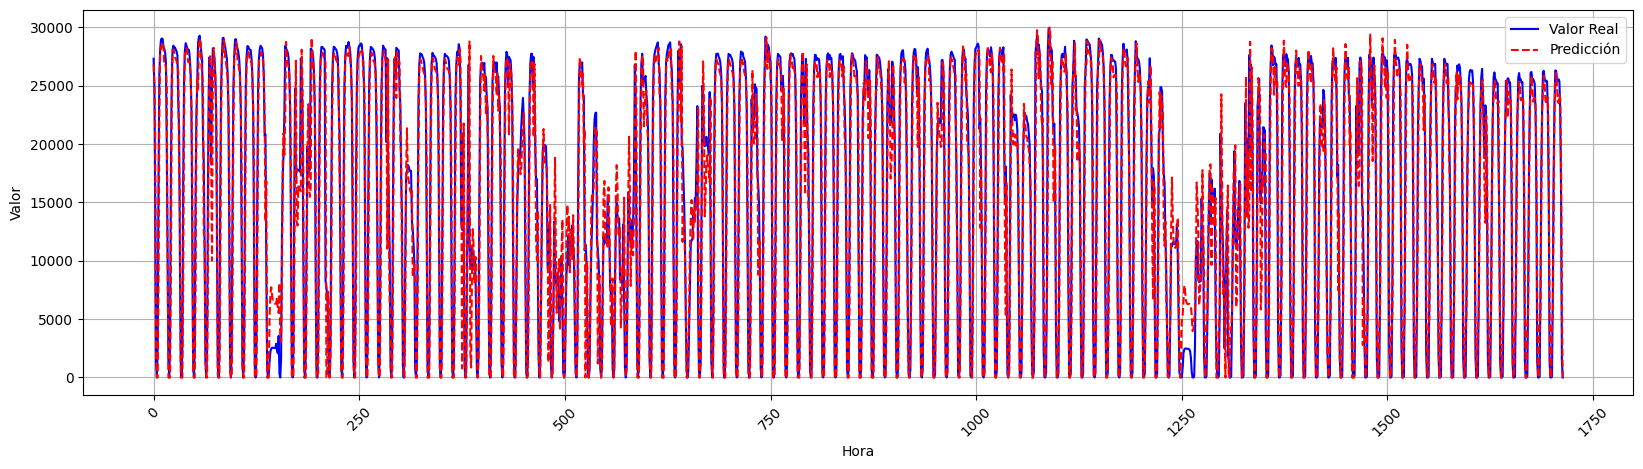

In [258]:
plt.figure(figsize=(20, 5))
plt.plot(y_test_original, label='Valor Real', color='blue')
plt.plot(y_pred_original, label='Predicción', color='red', linestyle='dashed')
plt.xlabel("Hora")
plt.ylabel("Valor")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

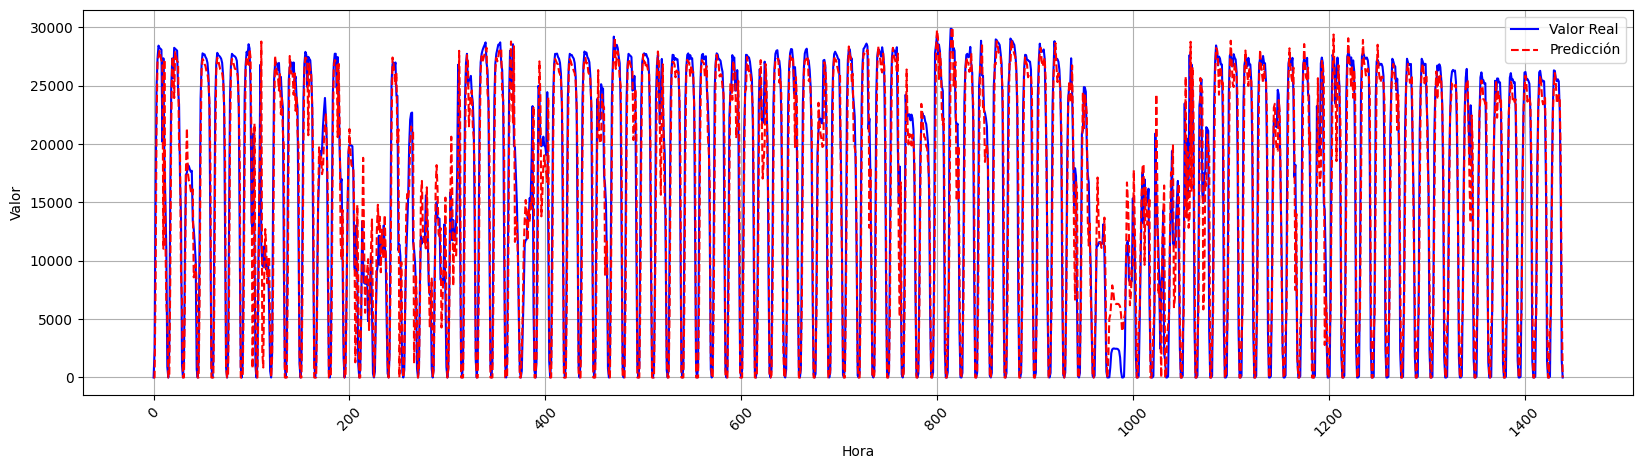

In [259]:
plt.figure(figsize=(20, 5))
plt.plot(y_test_original[-(24*60):], label='Valor Real', color='blue')
plt.plot(y_pred_original[-(24*60):], label='Predicción', color='red', linestyle='dashed')
plt.xlabel("Hora")
plt.ylabel("Valor")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

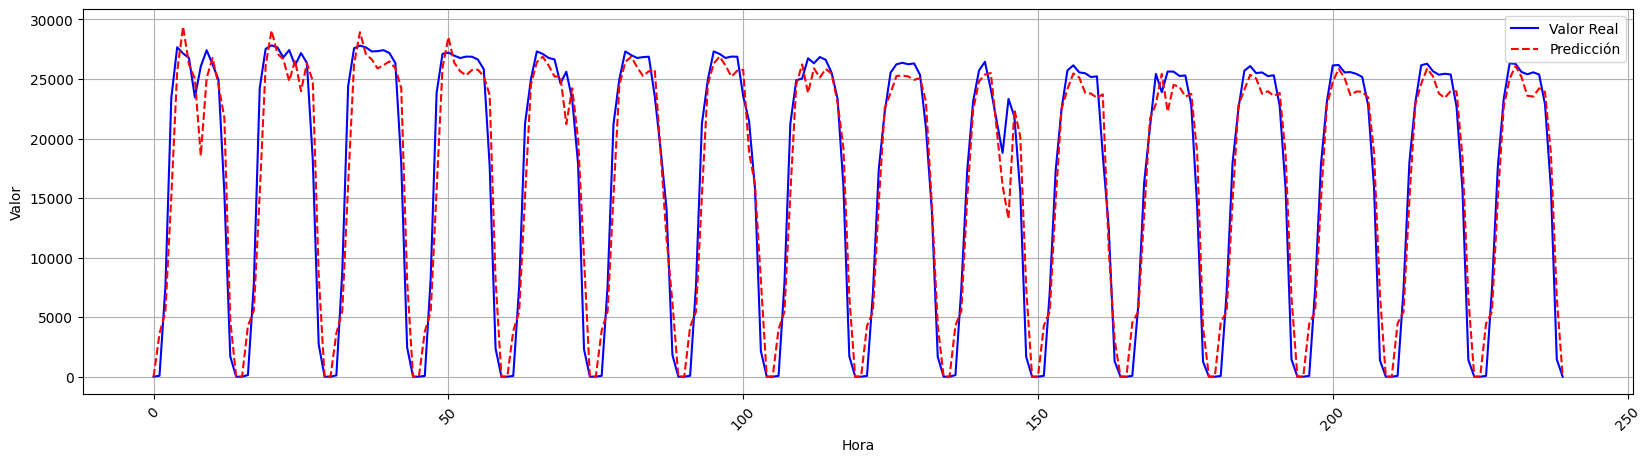

In [260]:
plt.figure(figsize=(20, 5))
plt.plot(y_test_original[-(24*10):], label='Valor Real', color='blue')
plt.plot(y_pred_original[-(24*10):], label='Predicción', color='red', linestyle='dashed')
plt.xlabel("Hora")
plt.ylabel("Valor")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [274]:
from tensorflow.keras.models import load_model
model2 = load_model('model3.keras')

In [275]:
train_predictions = model2.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals':y_train.flatten()})
train_results

250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


,Train Predictions,Actuals
0,0.203776,0.257353
1,0.504459,0.314437
2,0.482875,0.739638
3,0.831996,0.973233
4,1.035188,0.849282
...,...,...
7994,0.178509,0.015867
7995,0.200032,0.367067
7996,0.603495,0.789233
7997,0.868153,0.843733


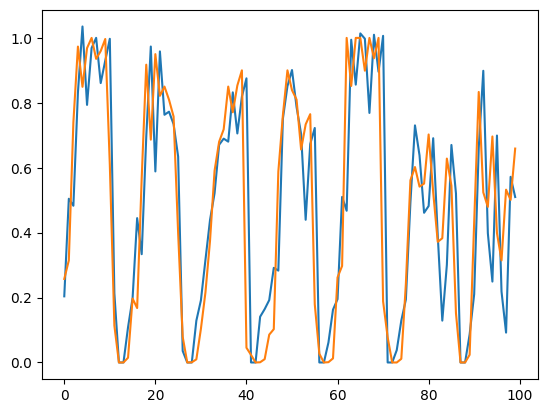

In [276]:
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

In [278]:
val_predictions = model2.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals':y_val.flatten()})
val_results

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Val Predictions,Actuals
0,0.779218,0.719133
1,0.549710,0.705567
2,0.581981,0.794833
3,0.758631,0.704333
4,0.606421,0.702000
...,...,...
1709,0.974747,0.981967
1710,0.974662,0.974533
1711,0.948455,0.962800
1712,0.926213,0.959467


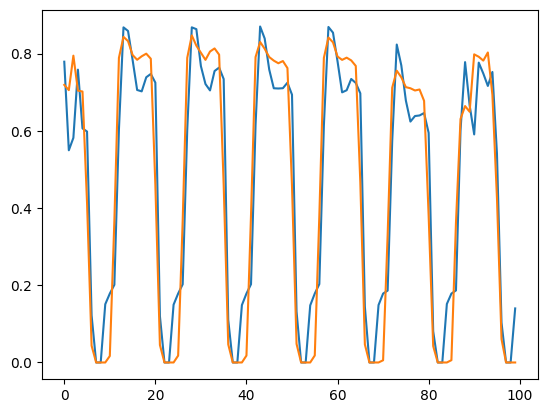

In [279]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [280]:
test_predictions = model2.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals':y_test.flatten()})
test_results

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


,Test Predictions,Actuals
0,0.894182,0.910900
1,0.840784,0.824167
2,0.680255,0.466833
3,0.072647,0.037900
4,0.000000,0.000000
...,...,...
1709,0.807254,0.846200
1710,0.796998,0.762400
1711,0.625414,0.527500
1712,0.221369,0.048333


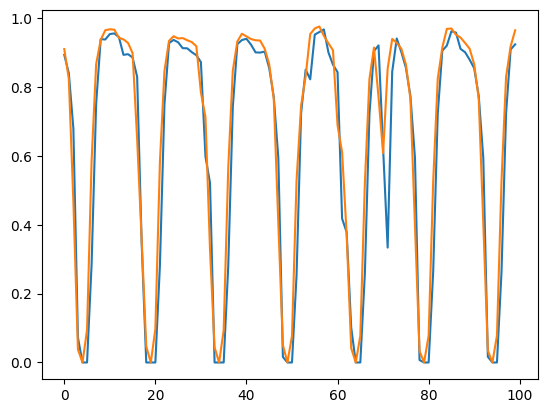

In [281]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [ ]:
# Part 2

In [298]:
def plot_predictions1(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    y = y.flatten()
    df = pd.DataFrame(data={'Predictions': predictions, 'Actuals': y})
    print(f"MAE: {mean_absolute_error(y, predictions):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y, predictions)):.4f}")
    print(f"R²: {r2_score(y, predictions):.4f}")
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    return df, mean_absolute_error(y, predictions)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MAE: 0.0794
RMSE: 0.1194
R²: 0.8868


(      Predictions   Actuals
 0        0.894182  0.910900
 1        0.840784  0.824167
 2        0.680255  0.466833
 3        0.072647  0.037900
 4        0.000000  0.000000
 ...           ...       ...
 1709     0.807254  0.846200
 1710     0.796998  0.762400
 1711     0.625414  0.527500
 1712     0.221369  0.048333
 1713     0.000000  0.000000
 
 [1714 rows x 2 columns],
 0.07943939063706575)

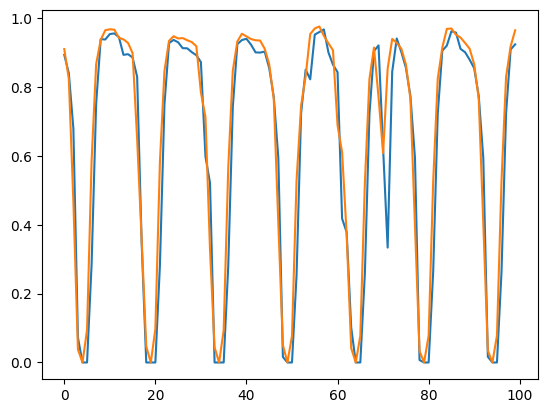

In [300]:
plot_predictions1(model2, X_test, y_test)

In [289]:
model4 = Sequential()
model4.add(InputLayer((3, 1)))
model4.add(Conv1D(64, kernel_size=2))
model4.add(Flatten())
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'relu'))

model4.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 2, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │         1,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,233 (4.82 KB)

 Trainable params: 1,233 (4.82 KB)

 Non-trainable params: 0 (0.00 B)

In [290]:
cp4 = ModelCheckpoint('model4.keras', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [291]:
history = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[cp, early_stop])

Epoch 1/50


250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.2935 - root_mean_squared_error: 0.5399 - val_loss: 0.0796 - val_root_mean_squared_error: 0.2821
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0691 - root_mean_squared_error: 0.2628 - val_loss: 0.0580 - val_root_mean_squared_error: 0.2409
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0541 - root_mean_squared_error: 0.2326 - val_loss: 0.0441 - val_root_mean_squared_error: 0.2100
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0436 - root_mean_squared_error: 0.2088 - val_loss: 0.0349 - val_root_mean_squared_error: 0.1869
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0374 - root_mean_squared_error: 0.1933 - val_loss: 0.0294 - val_root_mean_squared_error: 0.1716
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0331 - root_mean_squared_error: 0.1820 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1625
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.

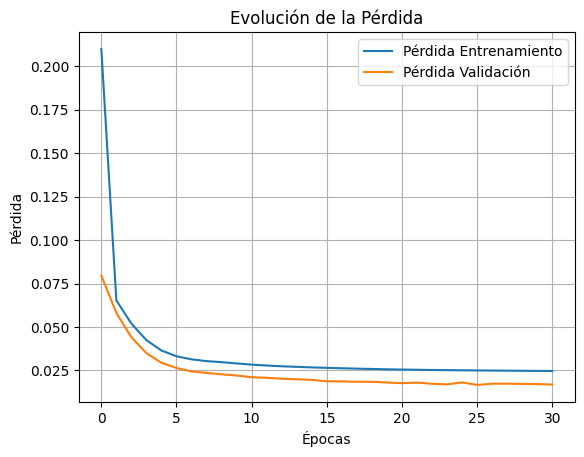

In [292]:
import matplotlib.pyplot as plt

# Extraer la pérdida del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear la gráfica
plt.plot(train_loss, label='Pérdida Entrenamiento')
plt.plot(val_loss, label='Pérdida Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida')
plt.legend()
plt.grid(True)
plt.show()

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 0.0895
RMSE: 0.1274
R²: 0.8711


(      Predictions   Actuals
 0        0.840078  0.910900
 1        0.798809  0.824167
 2        0.674852  0.466833
 3        0.125727  0.037900
 4        0.006164  0.000000
 ...           ...       ...
 1709     0.791601  0.846200
 1710     0.783359  0.762400
 1711     0.642659  0.527500
 1712     0.284117  0.048333
 1713     0.006164  0.000000
 
 [1714 rows x 2 columns],
 0.08951689209015394)

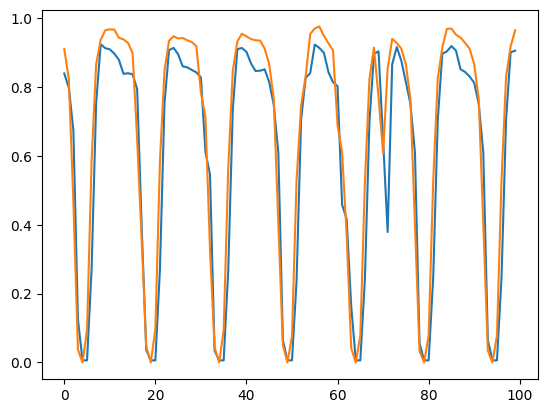

In [299]:
plot_predictions1(model4, X_test, y_test)

In [306]:
model5 = Sequential()
model5.add(InputLayer((WINDOW_SIZE, 1)))
model5.add(GRU(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(1, 'relu'))

model5.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,393 (52.32 KB)

 Trainable params: 13,393 (52.32 KB)

 Non-trainable params: 0 (0.00 B)

In [307]:
cp5 = ModelCheckpoint('model5.keras', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [308]:
history = model5.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[cp, early_stop])

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.2357 - root_mean_squared_error: 0.4829 - val_loss: 0.0899 - val_root_mean_squared_error: 0.2998
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0775 - root_mean_squared_error: 0.2783 - val_loss: 0.0722 - val_root_mean_squared_error: 0.2687
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0662 - root_mean_squared_error: 0.2572 - val_loss: 0.0554 - val_root_mean_squared_error: 0.2353
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0511 - root_mean_squared_error: 0.2260 - val_loss: 0.0393 - val_root_mean_squared_error: 0.1982
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0385 - root_mean_squared_error: 0.1962 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1672
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0305 - root_mean_squared_error: 0.1746 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1554
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step 

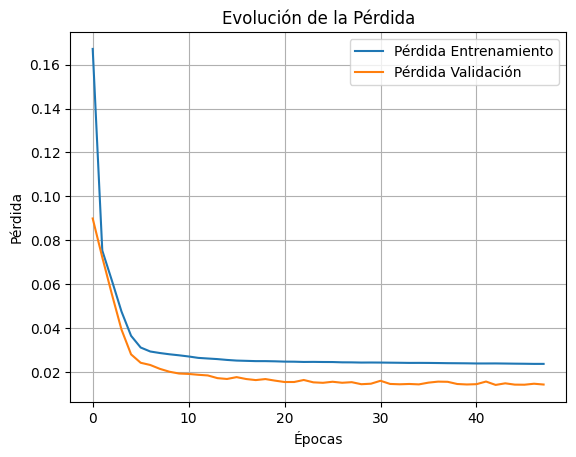

In [309]:
import matplotlib.pyplot as plt

# Extraer la pérdida del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear la gráfica
plt.plot(train_loss, label='Pérdida Entrenamiento')
plt.plot(val_loss, label='Pérdida Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida')
plt.legend()
plt.grid(True)
plt.show()

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
MAE: 0.0799
RMSE: 0.1212
R²: 0.8835


(      Predictions   Actuals
 0        0.902763  0.910900
 1        0.867687  0.824167
 2        0.701859  0.466833
 3        0.000000  0.037900
 4        0.000000  0.000000
 ...           ...       ...
 1709     0.817184  0.846200
 1710     0.811174  0.762400
 1711     0.646169  0.527500
 1712     0.186258  0.048333
 1713     0.000000  0.000000
 
 [1714 rows x 2 columns],
 0.07987601598980176)

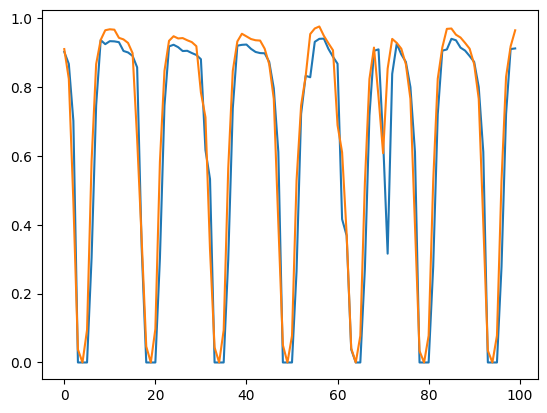

In [310]:
plot_predictions1(model5, X_test, y_test)

In [311]:
gen

Fecha
2022-09-01 06:00:00        0.000000
2022-09-01 07:00:00        6.584959
2022-09-01 08:00:00      560.422022
2022-09-01 09:00:00     7720.582326
2022-09-01 10:00:00     9433.109309
                           ...     
2024-10-02 16:00:00    25386.000000
2024-10-02 17:00:00    22872.000000
2024-10-02 18:00:00    15825.000000
2024-10-02 19:00:00     1450.000000
2024-10-02 20:00:00        0.000000
Name: Generación, Length: 11430, dtype: float64

In [316]:
gen_df = df_dia.drop(columns='Fecha').copy()
gen_df['Segundos'] = gen_df.index.map(pd.Timestamp.timestamp)
gen_df

,Generación,Índice UV,Temperatura,Hora,DPT,Cobertura Nubes,Condición Cielo,Humedad Relativa,Segundos
Fecha,,,,,,,,,
2022-09-01 06:00:00,0.000000,0.0,18,6,16,54,3,89,1.662012e+09
2022-09-01 07:00:00,6.584959,0.0,18,7,17,70,4,95,1.662016e+09
2022-09-01 08:00:00,560.422022,0.0,18,8,18,72,3,100,1.662019e+09
2022-09-01 09:00:00,7720.582326,1.0,18,9,18,81,4,100,1.662023e+09
2022-09-01 10:00:00,9433.109309,2.0,19,10,18,89,4,93,1.662026e+09
...,...,...,...,...,...,...,...,...,...
2024-10-02 16:00:00,25386.000000,4.0,26,16,8,25,2,31,1.727885e+09
2024-10-02 17:00:00,22872.000000,2.0,26,17,8,18,1,32,1.727888e+09
2024-10-02 18:00:00,15825.000000,1.0,25,18,8,11,1,33,1.727892e+09


In [318]:
day = 60*60*24
year = 365.2425*day

gen_df['Day sin'] = np.sin(gen_df['Segundos'] * (2* np.pi /day))
gen_df['Day cos'] = np.cos(gen_df['Segundos'] * (2* np.pi /day))
gen_df['Year sin'] = np.sin(gen_df['Segundos'] * (2* np.pi /year))
gen_df['Year cos'] = np.cos(gen_df['Segundos'] * (2* np.pi /year))
gen_df

,Generación,Índice UV,Temperatura,Hora,DPT,Cobertura Nubes,Condición Cielo,Humedad Relativa,Segundos,Day sin,Day cos,Year sin,Year cos
Fecha,,,,,,,,,,,,,
2022-09-01 06:00:00,0.000000,0.0,18,6,16,54,3,89,1.662012e+09,1.000000,-1.432608e-13,-0.867270,-0.497838
2022-09-01 07:00:00,6.584959,0.0,18,7,17,70,4,95,1.662016e+09,0.965926,-2.588190e-01,-0.867627,-0.497216
2022-09-01 08:00:00,560.422022,0.0,18,8,18,72,3,100,1.662019e+09,0.866025,-5.000000e-01,-0.867983,-0.496594
2022-09-01 09:00:00,7720.582326,1.0,18,9,18,81,4,100,1.662023e+09,0.707107,-7.071068e-01,-0.868338,-0.495972
2022-09-01 10:00:00,9433.109309,2.0,19,10,18,89,4,93,1.662026e+09,0.500000,-8.660254e-01,-0.868694,-0.495350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-02 16:00:00,25386.000000,4.0,26,16,8,25,2,31,1.727885e+09,-0.866025,-5.000000e-01,-0.999602,0.028205
2024-10-02 17:00:00,22872.000000,2.0,26,17,8,18,1,32,1.727888e+09,-0.965926,-2.588190e-01,-0.999582,0.028922
2024-10-02 18:00:00,15825.000000,1.0,25,18,8,11,1,33,1.727892e+09,-1.000000,-3.677924e-12,-0.999561,0.029638


In [320]:
gen_df2 = gen_df.copy()
gen_df2["Generacion_prev_hour"] = gen_df2["Generación"].shift(1)
datos_dropna = gen_df2.dropna(how="any", axis= 0)

In [319]:
gen_df = gen_df.drop('Segundos', axis=1)
gen_df.head()

,Generación,Índice UV,Temperatura,Hora,DPT,Cobertura Nubes,Condición Cielo,Humedad Relativa,Day sin,Day cos,Year sin,Year cos
Fecha,,,,,,,,,,,,
2022-09-01 06:00:00,0.000000,0.0,18,6,16,54,3,89,1.000000,-1.432608e-13,-0.867270,-0.497838
2022-09-01 07:00:00,6.584959,0.0,18,7,17,70,4,95,0.965926,-2.588190e-01,-0.867627,-0.497216
2022-09-01 08:00:00,560.422022,0.0,18,8,18,72,3,100,0.866025,-5.000000e-01,-0.867983,-0.496594
2022-09-01 09:00:00,7720.582326,1.0,18,9,18,81,4,100,0.707107,-7.071068e-01,-0.868338,-0.495972
2022-09-01 10:00:00,9433.109309,2.0,19,10,18,89,4,93,0.500000,-8.660254e-01,-0.868694,-0.495350


In [321]:
datos_dropna.head()

,Generación,Índice UV,Temperatura,Hora,DPT,Cobertura Nubes,Condición Cielo,Humedad Relativa,Day sin,Day cos,Year sin,Year cos,Generacion_prev_hour
Fecha,,,,,,,,,,,,,
2022-09-01 07:00:00,6.584959,0.0,18,7,17,70,4,95,0.965926,-0.258819,-0.867627,-0.497216,0.000000
2022-09-01 08:00:00,560.422022,0.0,18,8,18,72,3,100,0.866025,-0.500000,-0.867983,-0.496594,6.584959
2022-09-01 09:00:00,7720.582326,1.0,18,9,18,81,4,100,0.707107,-0.707107,-0.868338,-0.495972,560.422022
2022-09-01 10:00:00,9433.109309,2.0,19,10,18,89,4,93,0.500000,-0.866025,-0.868694,-0.495350,7720.582326
2022-09-01 11:00:00,22189.147406,2.0,20,11,17,98,4,79,0.258819,-0.965926,-0.869049,-0.494727,9433.109309


In [322]:
# [[[v11, v12, v13], [v21, v22, v23], [v31, v32, v13], [v11, v12, v13], [v11, v12, v13]]] [t6] 
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def datos_to_X_y2(df, window_size=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [325]:
WINDOW_SIZE = 6
X2, y2 = datos_to_X_y2(datos_dropna, WINDOW_SIZE)
X2.shape, y2.shape

((11423, 6, 13), (11423,))

In [326]:
num_datos = X2.shape[0]
train = int(round(num_datos*0.7,0))
val = int(train + round((num_datos - train) / 2, 0))

num_datos, train, val

(11423, 7996, 9710)

In [330]:
X_train2, y_train2 = X2[:train], y2[:train]
X_val2, y_val2 = X2[train:val], y2[train:val]
X_test2, y_test2 = X2[val:], y2[val:]
X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape

((7996, 6, 13), (7996,), (1714, 6, 13), (1714,), (1713, 6, 13), (1713,))

In [331]:
X_train2

array([[[ 6.58495869e+00,  0.00000000e+00,  1.80000000e+01, ...,
         -8.67626528e-01, -4.97216459e-01,  0.00000000e+00],
        [ 5.60422022e+02,  0.00000000e+00,  1.80000000e+01, ...,
         -8.67982702e-01, -4.96594432e-01,  6.58495869e+00],
        [ 7.72058233e+03,  1.00000000e+00,  1.80000000e+01, ...,
         -8.68338429e-01, -4.95972150e-01,  5.60422022e+02],
        [ 9.43310931e+03,  2.00000000e+00,  1.90000000e+01, ...,
         -8.68693710e-01, -4.95349613e-01,  7.72058233e+03],
        [ 2.21891474e+04,  2.00000000e+00,  2.00000000e+01, ...,
         -8.69048544e-01, -4.94726821e-01,  9.43310931e+03],
        [ 2.91969866e+04,  6.00000000e+00,  2.20000000e+01, ...,
         -8.69402933e-01, -4.94103775e-01,  2.21891474e+04]],

       [[ 5.60422022e+02,  0.00000000e+00,  1.80000000e+01, ...,
         -8.67982702e-01, -4.96594432e-01,  6.58495869e+00],
        [ 7.72058233e+03,  1.00000000e+00,  1.80000000e+01, ...,
         -8.68338429e-01, -4.95972150e-01,  5.60422

In [328]:
scaler = MinMaxScaler()
X_train2 = scaler.fit_transform(X_train2.reshape(-1, X_train2.shape[-1])).reshape(X_train2.shape)
X_val2 = scaler.transform(X_val2.reshape(-1, X_val2.shape[-1])).reshape(X_val2.shape)
X_test2 = scaler.transform(X_test2.reshape(-1, X_test2.shape[-1])).reshape(X_test2.shape)

In [332]:
scaler_y = MinMaxScaler()
y_train2 = scaler_y.fit_transform(y_train2.reshape(-1, 1))
y_val2 = scaler_y.transform(y_val2.reshape(-1, 1))
y_test2 = scaler_y.transform(y_test2.reshape(-1, 1))

In [336]:
features = X_train2.shape[2]

In [341]:
model6 = Sequential()
model6.add(InputLayer((WINDOW_SIZE, features)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(1, 'relu'))
model6.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 6, 32)          │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,249 (122.07 KB)

 Trainable params: 31,249 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

In [342]:
cp6 = ModelCheckpoint('model6.keras', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [343]:
history = model6.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=50, batch_size=32, callbacks=[cp6, early_stop])

Epoch 1/50


250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.2337 - root_mean_squared_error: 0.4758 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1586
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.0326 - root_mean_squared_error: 0.1805 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1313
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0275 - root_mean_squared_error: 0.1656 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1314
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0259 - root_mean_squared_error: 0.1610 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1305
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - loss: 0.0245 - root_mean_squared_error: 0.1564 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1462
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - loss: 0.0234 - root_mean_squared_error: 0.1529 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1277
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step -

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
MAE: 0.0932
RMSE: 0.1417
R²: 0.8407


(      Predictions   Actuals
 0        0.622212  0.824167
 1        0.540297  0.466833
 2        0.000000  0.037900
 3        0.000000  0.000000
 4        0.000000  0.094633
 ...           ...       ...
 1708     0.842218  0.846200
 1709     0.828501  0.762400
 1710     0.646448  0.527500
 1711     0.080048  0.048333
 1712     0.000000  0.000000
 
 [1713 rows x 2 columns],
 0.09320585029597157)

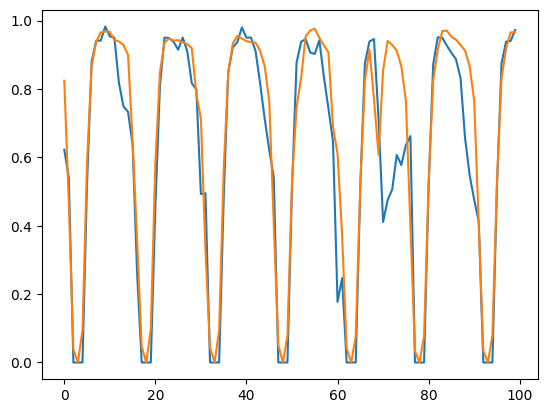

In [344]:
plot_predictions1(model6, X_test2, y_test2)